In [10]:
library(gap)
library(dplyr)
library(ggplot2)
library(VennDiagram)

Loading required package: grid
Loading required package: futile.logger


## Panel A - Manhattan plot

In [2]:
data=read.delim("data/fig2_sex-biased_eQTL_results.txt")
#select top 10 genes
top10m=data %>% top_n(-10,q_males)
top10m
top10f=data %>% top_n(-10,q_females)
top10f

Probe_Id,SNP_females,q_females,CHR,SNP_males,q_males,P_start,P_end
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
ILMN_1651385,rs816063,0.713300,1,rs2295281,0.000012,12073097,12073147
ILMN_1665457,rs7960410,0.000046,12,rs10845821,0.000002,7898953,7899002
ILMN_1672004,rs28490496,0.000294,17,rs75113598,0.000026,48940473,48940522
ILMN_1679826,rs68007865,0.785500,20,rs6050131,0.000256,24940339,24940388
ILMN_1682259,rs7960410,0.000132,12,rs11055602,0.000004,7882292,7883397
ILMN_1736982,rs9395495,0.037110,6,rs4715146,0.000054,13283746,13286378
ILMN_1777721,rs291671,0.225900,20,rs853859,0.000048,31437828,31437877
ILMN_2144116,rs7146688,0.054440,14,rs4243696,0.000218,92630387,92630436
ILMN_2313901,rs258151,0.000002,5,rs171803,0.000060,102365110,102365161


Probe_Id,SNP_females,q_females,CHR,SNP_males,q_males,P_start,P_end
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
ILMN_1665457,rs7960410,0.000046,12,rs10845821,0.000002,7898953,7899002
ILMN_1675038,rs2839321,0.000022,21,rs60526571,0.119500,48084511,48084563
ILMN_1679520,rs114213616,0.000180,6,rs4947324,0.980900,32136428,32136477
ILMN_1682259,rs7960410,0.000132,12,rs11055602,0.000004,7882292,7883397
ILMN_1692620,rs4785909,0.000054,16,rs11077325,0.995900,3341193,3341242
ILMN_1721035,rs632185,0.000200,11,rs2298553,0.897200,59940544,59940594
ILMN_1770732,rs12602831,0.000030,17,rs1736219,0.002742,17150327,17150376
ILMN_1776181,rs7124969,0.000184,11,rs61893629,0.018930,102208238,102208288
ILMN_1811933,rs57808902,0.000036,17,rs7216214,0.000946,18231381,18231430


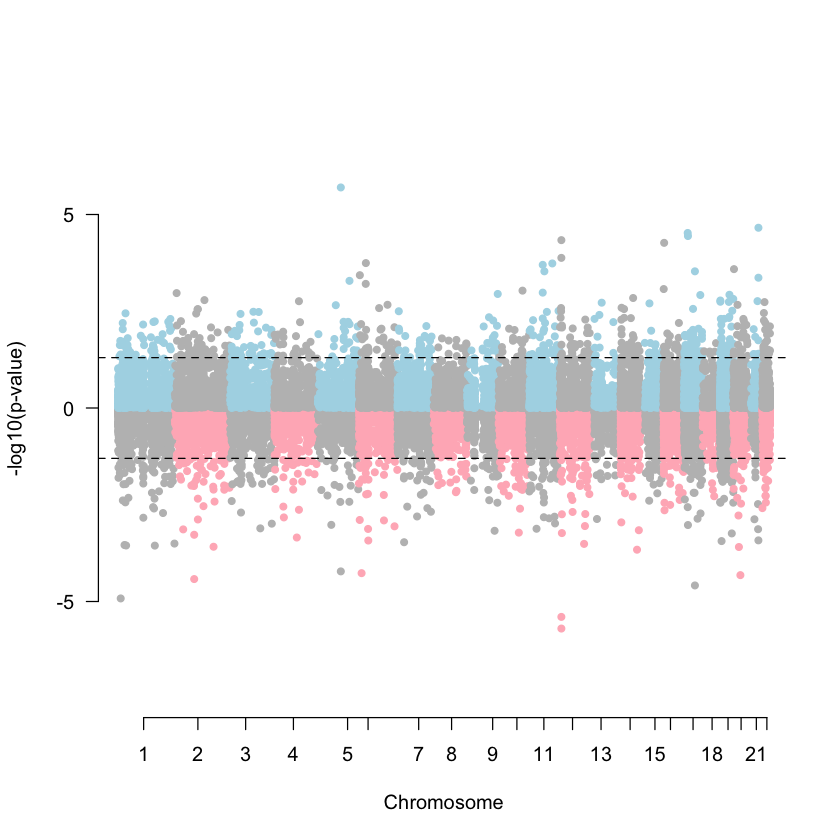

In [3]:
ops=control=mht.control(cutoffs=c(-log10(0.05)),labels=paste("Chr",1:22,sep=""))
#png("Figure2A.png",height=3600,width=6000,res=600)
miamiplot(data,chr="CHR",bp="P_start",p="q_females",pr="q_males",snp="Probe_Id",lcols = c(),
          col = c("lightblue", "grey"), col2 = c("grey", "lightpink"),ylab="-log10(p-value)")
abline(h = -log10(0.05),lty = 2, lwd = 1)
abline(h = log10(0.05),lty = 2, lwd = 1)
#dev.off()

## Panel B - Scatterplot

In [5]:
all.fc =read.delim("data/fig1_sex-biased_DEresults.txt")
male.eqtl = read.delim("../Supplementary_Tables/SupplementaryTable9_males_GR_0519.txt")
female.eqtl = read.delim("../Supplementary_Tables/SupplementaryTable7_females_GR_0519.txt")

both= all.fc[,c("X", "male.fold_change","female.fold_change")]
both$col="neither"
male_fe=intersect(female.eqtl$Probe_Id, male.eqtl$Probe_Id)
#length(male_fe)
both[ both$X %in% male_fe,]$col="both"
m_only=setdiff(male.eqtl$Probe_Id,female.eqtl$Probe_Id) 
#length(m_only)
both[ both$X %in% m_only,]$col="males_only"
fe_only=setdiff(female.eqtl$Probe_Id, male.eqtl$Probe_Id) #567
both[ both$X %in% fe_only,]$col="females_only"
both$log_fold_change_males = sign(both$male.fold_change)*log2(abs(both$male.fold_change))
both$log_fold_change_females = sign(both$female.fold_change)*log2(abs(both$female.fold_change))
head(both)

X,male.fold_change,female.fold_change,col,log_fold_change_males,log_fold_change_females
<fct>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
ILMN_1343291,-1.097019,-1.163595,neither,-0.13358870,-0.21858897
ILMN_1343295,-1.010550,1.038139,neither,-0.01514038,0.05399943
ILMN_1651209,1.024536,1.019914,neither,0.03497129,0.02844814
ILMN_1651228,-1.141819,-1.231329,females_only,-0.19133367,-0.30021617
ILMN_1651229,-1.046575,-1.088366,neither,-0.06567544,-0.12216428
ILMN_1651254,1.079882,1.163299,neither,0.11087355,0.21822231


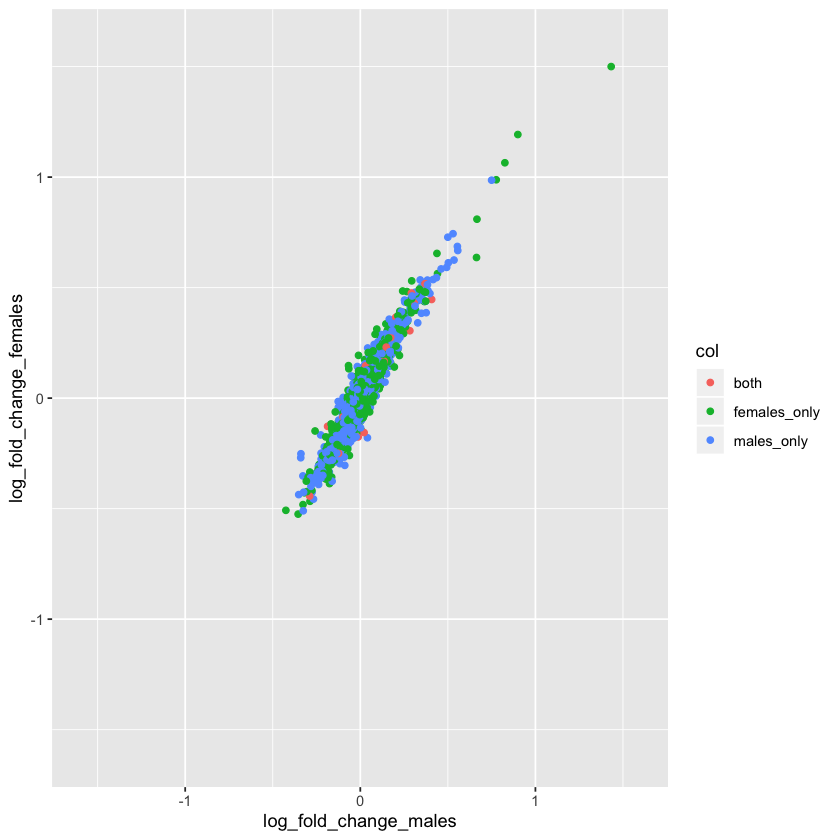

In [6]:
#pdf("scatter_plot.pdf")
ggplot(both[ both$col!="neither",], aes(x=log_fold_change_males, y=log_fold_change_females, color=col)) +geom_point() +xlim(-1.6, 1.6) + ylim(-1.6, 1.6)
#dev.off()

## Panel C - Venn diagram

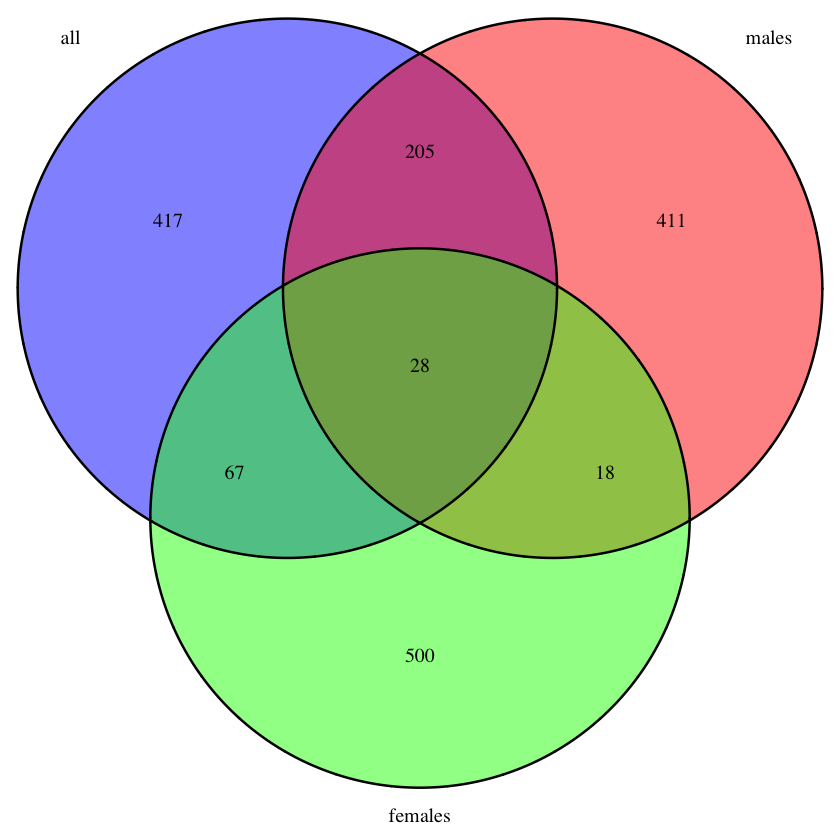

In [11]:
all.eqtl = read.delim("../Supplementary_Tables/SupplementaryTable5_all_GReQTLs_0519.txt")

mixed_male=length(intersect(all.eqtl$Probe_Id,male.eqtl$Probe_Id))
mixed_fe=length(intersect(all.eqtl$Probe_Id,female.eqtl$Probe_Id))
male_fe=length(intersect(female.eqtl$Probe_Id, male.eqtl$Probe_Id))
mixed_male_fe=length(intersect(all.eqtl$Probe_Id, intersect(female.eqtl$Probe_Id,male.eqtl$Probe_Id)))

#pdf("Figure2C.pdf")
venn.plot <- draw.triple.venn(
  area1 = length(unique(all.eqtl$Probe_Id)),
  area2 = length(unique(male.eqtl$Probe_Id)),
  area3 = length(unique(female.eqtl$Probe_Id)),
  n12 = mixed_male,
  n23 = male_fe,
  n13 = mixed_fe,
  n123 = mixed_male_fe,
  category = c("all", "males", "females"),
  fill = c("blue", "red", "green"),
  #lty = rep("solid",3),
  scaled=TRUE)
#dev.off()

## Panel D - Venn diagrams with FC cutoff

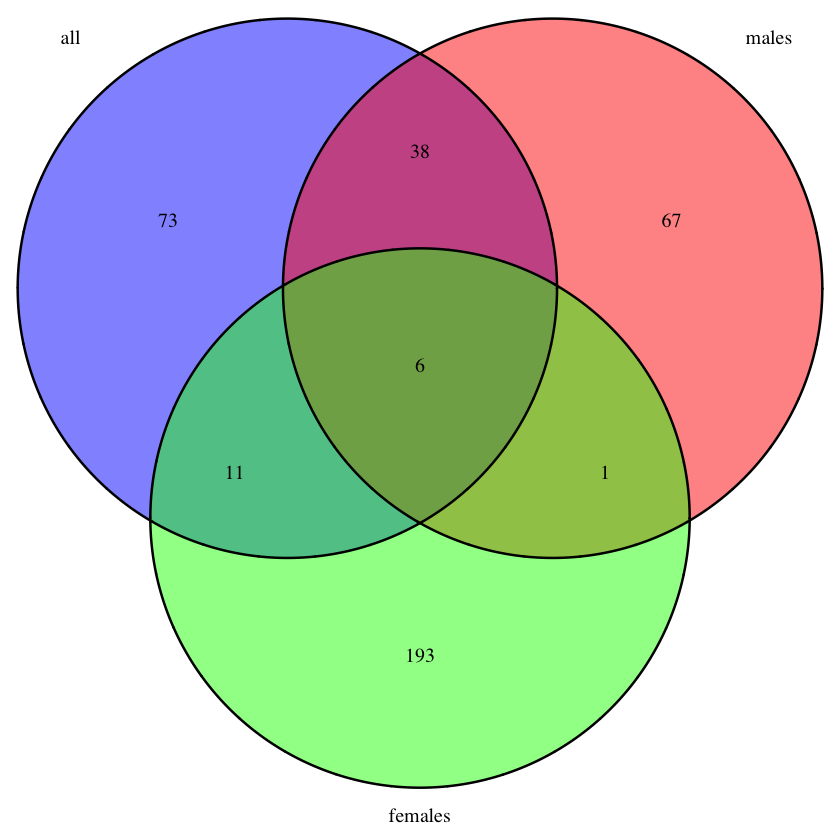

In [12]:
all.eqtl.fc=all.eqtl[abs(all.eqtl$fold_change)>=1.15,]
male.eqtl.fc=male.eqtl[abs(male.eqtl$fold_change)>=1.15,]
female.eqtl.fc=female.eqtl[abs(female.eqtl$fold_change)>=1.15,]

mixed_male=length(intersect(all.eqtl.fc$Probe_Id,male.eqtl.fc$Probe_Id))
mixed_fe=length(intersect(all.eqtl.fc$Probe_Id,female.eqtl.fc$Probe_Id))
male_fe=length(intersect(female.eqtl.fc$Probe_Id, male.eqtl.fc$Probe_Id))
mixed_male_fe=length(intersect(all.eqtl.fc$Probe_Id, intersect(female.eqtl.fc$Probe_Id,male.eqtl.fc$Probe_Id)))

#pdf("Figure2E.pdf")
grid.newpage()
venn.plot <- draw.triple.venn(
  area1 = length(unique(all.eqtl.fc$Probe_Id)),
  area2 = length(unique(male.eqtl.fc$Probe_Id)),
  area3 = length(unique(female.eqtl.fc$Probe_Id)),
  n12 = mixed_male,
  n23 = male_fe,
  n13 = mixed_fe,
  n123 = mixed_male_fe,
  category = c("all", "males", "females"),
  fill = c("blue", "red", "green"),
  #lty = rep("solid",3),
  scaled=TRUE)
#dev.off()

## Panel E-G - Boxplots

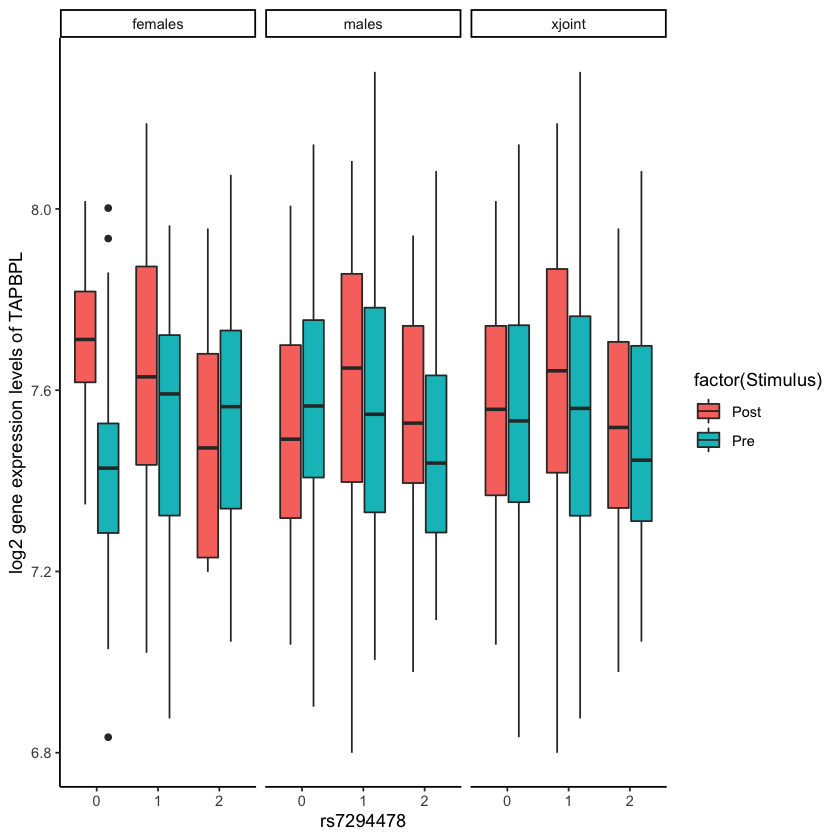

In [14]:
#female specific GR-response eQTL
exampleF = readRDS("data/fig2E_female_eQTL.rds")
#pdf("ILMN_1805449.pdf")
ggplot(na.omit(exampleF), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs7294478")+ylab("log2 gene expression levels of TAPBPL")
#dev.off()

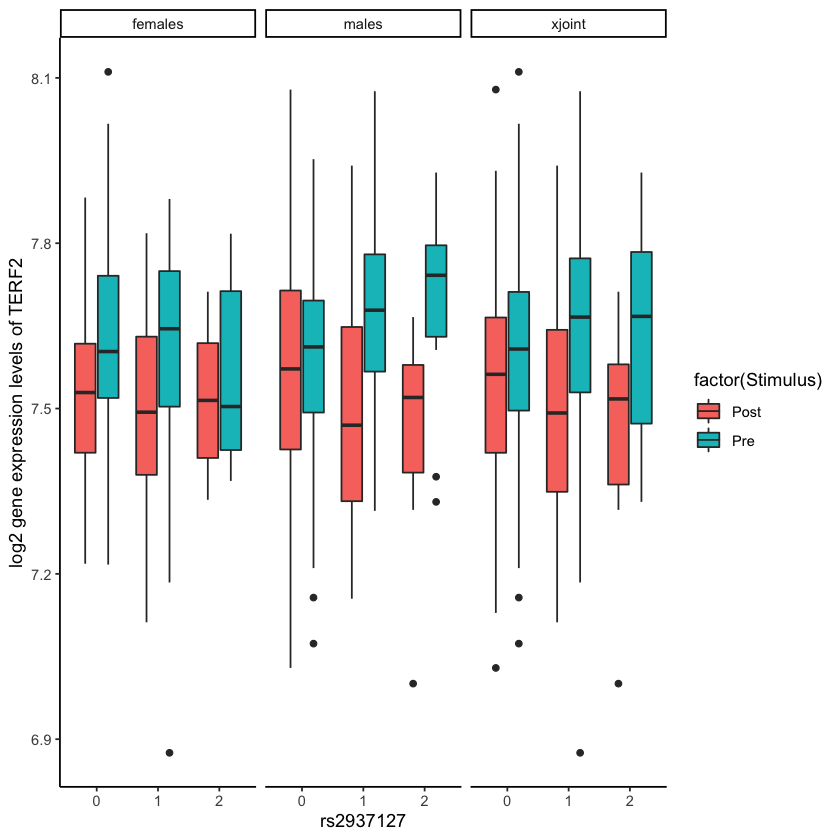

In [15]:
#male specific GR-response eQTL
exampleM = readRDS("data/fig2F_male_eQTL.rds")
#pdf("ILMN_1768488.pdf")
ggplot(na.omit(exampleM), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs2937127")+ylab("log2 gene expression levels of TERF2")
#dev.off()

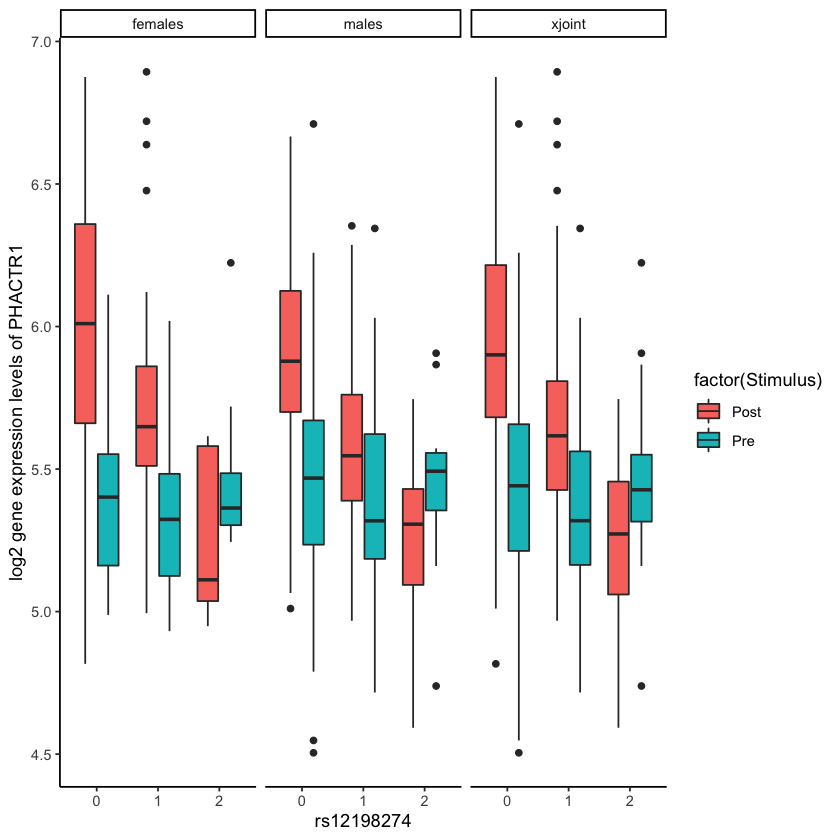

In [16]:
#joint GR-response eQTL
exampleAll = readRDS("data/fig2G_all_eQTL.rds")
#pdf("ILMN_1736982.pdf")
ggplot(na.omit(exampleAll), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs12198274")+ylab("log2 gene expression levels of PHACTR1")
#dev.off()